<a href="https://colab.research.google.com/github/montimaj/Deep-Learning-SE-6213/blob/master/HW7/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd 'drive/My Drive/SysEng 6213 Fall 2020 Sayantan Majumdar /HW7'
!ls

/content/drive/.shortcut-targets-by-id/1xpWpUfn0NqGtbgAP_303jr6QW5RKzJPR/SysEng 6213 Fall 2020 Sayantan Majumdar /HW7
cifar-10-batches-py  cnn_model.png  conv_demo.png  layers.py
cnn.ipynb	     cnn_model.py   cp-sim.html    utilities.py


# SYS ENG 6213 - Deep Learning and Advanced Neural Networks 

In this assignment, you will implement the convolutional neural network and test it on a sample image. You can get good explanation of convolutional and pooling layers from the text book @ http://www.deeplearningbook.org/.


The code which you are to write will not be a __fast implementation__ since our goal is only to learn the convolution and pooling operation. The fast implementation can be implemented by converting convolution and pooling operations into matrix multiplications which is more complicated. 

Below is the architecture you will implement:

<img src="cnn_model.png" alt="Drawing" style="width: 200px;"/>

### 1. Python Implementation

complete the following functions in __layers.py__ and run the below code:

1. conv_forward (25 pts)
2. conv_backward (25 pts)
3. max_pool_forward (25 pts)
4. max_pool_backward (25 pts)

In [3]:
# import necessary libraries
import tensorflow as tf
import datetime
import time
import numpy as np
import datetime
import matplotlib.pyplot as plt
# import necessary functions
from utilities import *
np.random.seed(231)

In [4]:
# load the data
maybe_download_and_extract()
train_,tr_target,val_,val_target = load_CIFAR10_data()

file exists


In [5]:
print('training data shape: ' + str(train_.shape))
print('training target shape: ' + str(tr_target.shape))
print('validation data shape: ' + str(val_.shape))
print('validation target shape: ' + str(val_target.shape))

training data shape: (40000, 3072)
training target shape: (40000,)
validation data shape: (10000, 3072)
validation target shape: (10000,)


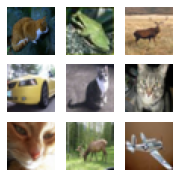

In [6]:
#view a few examples
img_idx = np.random.choice(40000, 9, replace=False)
sample = train_[img_idx].reshape(9, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
fig, axes1 = plt.subplots(3,3,figsize=(3,3))
i=0
for j in range(3):
    for k in range(3):
        #i = np.random.choice(range(len(sample)),replace=False)
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(sample[i])
        i=i+1
plt.show()

#### Try training on small data 

In [7]:
# For CIFAR-10 we have 3-dimensional data which are independent of each other. 
# Therefore, we have to normalize each dimension separately

X_train = train_.reshape(len(train_), 3, 32, 32).astype("float32")
X_val = val_.reshape(len(val_), 3, 32, 32).astype("float32")
_means = [] # for future re-use
for i in range(3):
    _mean = np.mean(X_train[:,i,:,:]) 
    X_train[:,i,:,:] = (X_train[:,i,:,:] - _mean)
    X_val[:,i,:,:] = (X_val[:,i,:,:] - _mean)
    _means.append(_mean)
    

Y_train = tr_target
Y_val = val_target
n = 100
data = {'X_train':X_train[0:n],'Y_train':Y_train[0:n],'X_val':X_val[0:30],'Y_val':Y_val[0:30]}

In [ ]:
# Initialize two_layered_NN instance
from cnn_model import n_layered_NN
model = n_layered_NN(data,batch_size=30,epochs=100)
# Train the two layered neural network
start_time = datetime.datetime.now()
params,loss_history,train_acc_history,val_acc_history=model.train()
print(datetime.datetime.now() - start_time)

***************************************************************
|                  Model Specifications:                      |
***************************************************************
input dimensions                :(100, 3, 32, 32)
output dimensions               :10
number of convolutional layers  :1
number of convolutional filters :32
convolutional filter size       :7
learning rate                   :0.001
batch size                      :30
number of epochs                :100
---------------------------------------------------------------
regularization type             :None
---------------------------------------------------------------
optimization type               :SGD
---------------------------------------------------------------
Epoch 1/100
(Iteration 1/3) loss: 2.3025134141078407
(Iteration 2/3) loss: 2.3025963765763313
(Iteration 3/3) loss: 2.3025325702416706
Train accuracy: 0.13 Validation accuracy: 0.13333333333333333
time for epoch: 0:00:22.233705
Epoch 2/1

In [ ]:
# Initialize two_layered_NN instance
from cnn_model import n_layered_NN
data = {'X_train':X_train[0:600],'Y_train':Y_train[0:600],'X_val':X_val[0:100],'Y_val':Y_val[0:100]}
model = n_layered_NN(data,batch_size=100,epochs=10, update_rule='SGD_with_momentum')
# Train the two layered neural network
start_time = datetime.datetime.now()
params,loss_history,train_acc_history,val_acc_history=model.train()
print(datetime.datetime.now() - start_time)

***************************************************************
|                  Model Specifications:                      |
***************************************************************
input dimensions                :(600, 3, 32, 32)
output dimensions               :10
number of convolutional layers  :1
number of convolutional filters :32
convolutional filter size       :7
learning rate                   :0.001
batch size                      :100
number of epochs                :10
---------------------------------------------------------------
regularization type             :None
---------------------------------------------------------------
optimization type               :SGD_with_momentum
---------------------------------------------------------------
Epoch 1/10
(Iteration 1/6) loss: 2.3025820692887335
(Iteration 2/6) loss: 2.302549926559746
(Iteration 3/6) loss: 2.302527340722646
(Iteration 4/6) loss: 2.3026379146382947
(Iteration 5/6) loss: 2.3026052170622306
(Iteratio

In [ ]:
# Initialize two_layered_NN instance
from cnn_model import n_layered_NN
data = {'X_train':X_train[0:1000],'Y_train':Y_train[0:1000],'X_val':X_val[0:200],'Y_val':Y_val[0:200]}
model = n_layered_NN(data,batch_size=100,epochs=100, update_rule='SGD_with_momentum')
# Train the two layered neural network
start_time = datetime.datetime.now()
params,loss_history,train_acc_history,val_acc_history=model.train()
print(datetime.datetime.now() - start_time)

***************************************************************
|                  Model Specifications:                      |
***************************************************************
input dimensions                :(1000, 3, 32, 32)
output dimensions               :10
number of convolutional layers  :1
number of convolutional filters :32
convolutional filter size       :7
learning rate                   :0.001
batch size                      :100
number of epochs                :100
---------------------------------------------------------------
regularization type             :None
---------------------------------------------------------------
optimization type               :SGD_with_momentum
---------------------------------------------------------------
Epoch 1/100
(Iteration 1/10) loss: 2.3025797406859017
(Iteration 2/10) loss: 2.302581034109218
(Iteration 3/10) loss: 2.302528211581647
(Iteration 4/10) loss: 2.302655636720131
(Iteration 5/10) loss: 2.3025034103673843
(I